# Pre-requisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#%matplotlib widget

In [2]:
countyCode = 'CW'
county = 'Carlow'
sample_size = 1000

# 1. Census population by age

In [4]:
ageProfile = pd.read_excel('Data/Census2016_Age_Distribution_ByCounty.xlsx', sheet_name='E2022.20211008T221047')

In [5]:
ageProfile.columns = ageProfile.columns.str.replace(' ', '_')

In [6]:
countyTotals = ageProfile.groupby(['County_and_City'], as_index=False).agg({'VALUE' : 'sum'}).sort_values(by='VALUE', ascending=False)

In [7]:
countyTotals

,County_and_City,VALUE
26,State,4761865
6,Dublin City,554554
4,Cork County,417211
8,Fingal,296020
25,South Dublin,278767
12,Kildare,222504
7,Dún Laoghaire-Rathdown,218018
20,Meath,195044
16,Limerick City and County,194899
10,Galway County,179390


# 2. Covid Data by County

In [8]:
covid_historic = pd.read_excel('Data/COVID-19_HPSC_County_Statistics_Historic_Data.xlsx', sheet_name='COVID-19_HPSC_County_Statistics')

In [12]:
covid_historic

,OBJECTID,ORIGID,CountyName,PopulationCensus16,TimeStamp,IGEasting,IGNorthing,Lat,Long,UGI,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered,Shape__Area,Shape__Length
0,1,1,Carlow,56932,2020-02-27 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,2.432352e+09,3.193486e+05
1,2,2,Cavan,76176,2020-02-27 00:00:00+00:00,246380,304501,53.9878,-7.2937,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,5.575010e+09,5.159545e+05
2,3,3,Clare,118817,2020-02-27 00:00:00+00:00,133493,182732,52.8917,-8.9889,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,8.722542e+09,1.013949e+06
3,4,4,Cork,542868,2020-02-27 00:00:00+00:00,156242,77860,51.9517,-8.6372,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,1.952949e+10,2.129949e+06
4,5,5,Donegal,159192,2020-02-27 00:00:00+00:00,202615,405691,54.8989,-7.9600,http://data.geohive.ie/resource/county/2ae1962...,0,NaN,NaN,NaN,1.462404e+10,2.145086e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15309,15310,22,Tipperary,159553,2021-10-09 00:00:00+00:00,205427,154345,52.6407,-7.9206,http://data.geohive.ie/resource/county/2ae1962...,9621,6029.971232,NaN,NaN,1.155120e+10,7.812766e+05
15310,15311,23,Waterford,116176,2021-10-09 00:00:00+00:00,234676,105809,52.2035,-7.4935,http://data.geohive.ie/resource/county/2ae1962...,8768,7547.169811,NaN,NaN,4.848380e+09,6.431849e+05
15311,15312,24,Westmeath,88770,2021-10-09 00:00:00+00:00,238362,255966,53.5524,-7.4219,http://data.geohive.ie/resource/county/2ae1962...,6714,7563.366002,NaN,NaN,5.208706e+09,4.226693e+05
15312,15313,25,Wexford,149722,2021-10-09 00:00:00+00:00,301627,141559,52.5164,-6.5037,http://data.geohive.ie/resource/county/2ae1962...,10142,6773.887605,NaN,NaN,6.332221e+09,5.893245e+05


In [10]:
covid_historic['TimeStamp'] = pd.to_datetime(covid_historic['TimeStamp'])

In [11]:
allCounties = covid_historic[(covid_historic['TimeStamp'] >= '2020-11-30') & (covid_historic['TimeStamp'] <= '2021-02-28')]

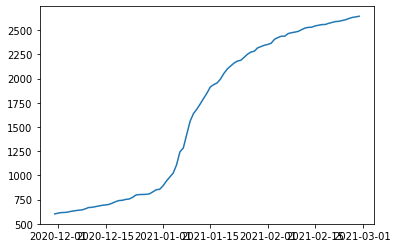

In [11]:
plt.plot(allCounties.loc[allCounties['CountyName'] == county, 'TimeStamp'], allCounties.loc[allCounties['CountyName'] == county, 'ConfirmedCovidCases'])

In [12]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')

In [13]:
allCountiesPlot = allCounties.copy()

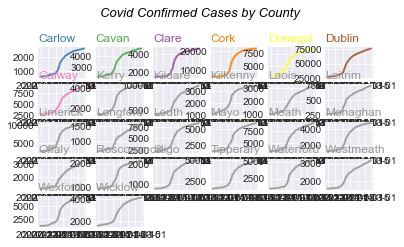

In [14]:
# multiple line plot
num = 0
for countyplot in allCountiesPlot['CountyName'].unique():
    num += 1
    
    #Find the right spot on the plot
    plt.subplot(6,6, num)
    
    # Plot the lineplot
    plt.plot(allCounties.loc[allCounties['CountyName'] == countyplot, 'TimeStamp'], allCounties.loc[allCounties['CountyName'] == countyplot, 'ConfirmedCovidCases'], marker='', color=palette(num), linewidth=1.9, alpha=0.9)
    
    # Same limits for every chart
    #plt.xlim(0, 10)
    #plt-ylim(-1, 22)
    
    # Not ticks everywhere
    plt.tick_params(labelbottom='off')
        
    # add title
    plt.title(countyplot, loc='left', fontsize=12, fontweight=0, color=palette(num))
    
    

# general title
plt.suptitle("Covid Confirmed Cases by County", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Cases', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

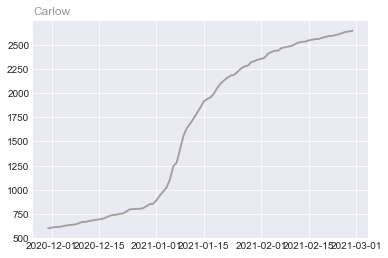

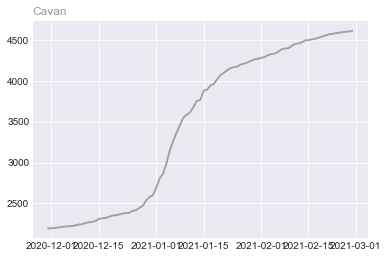

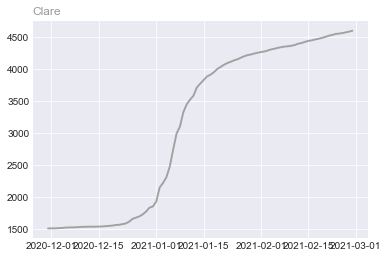

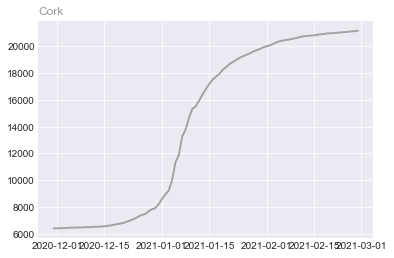

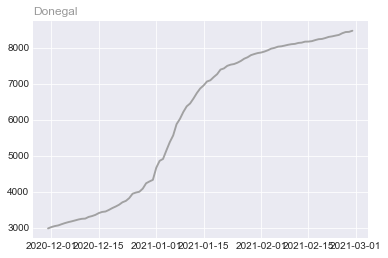

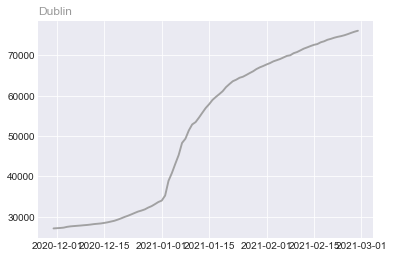

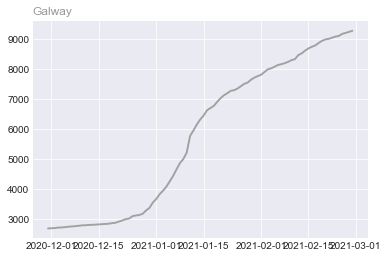

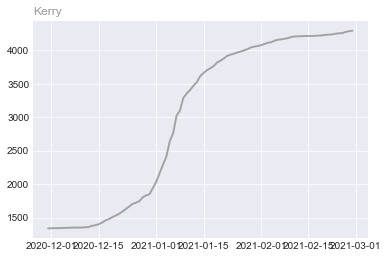

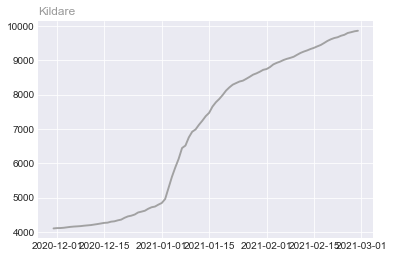

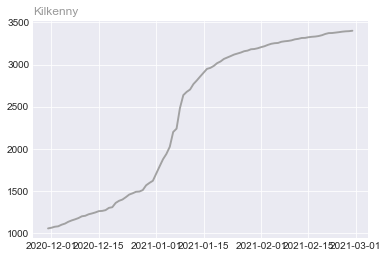

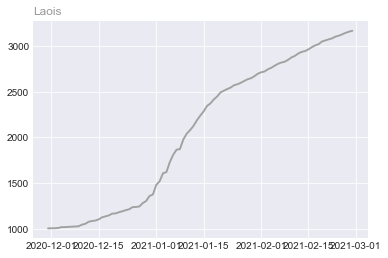

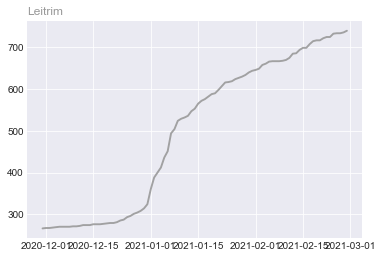

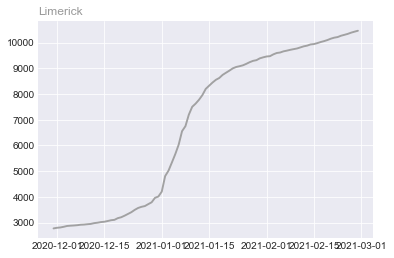

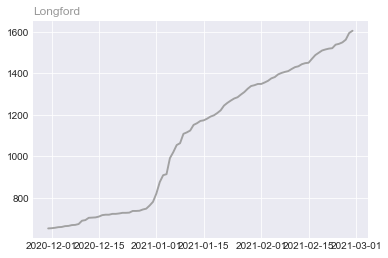

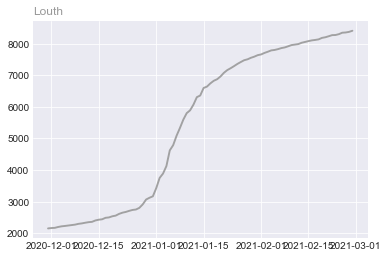

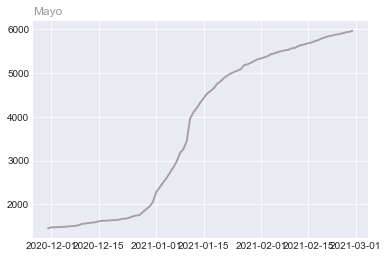

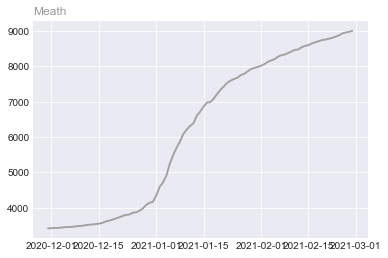

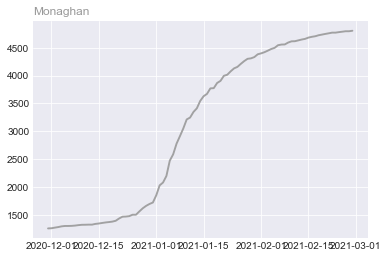

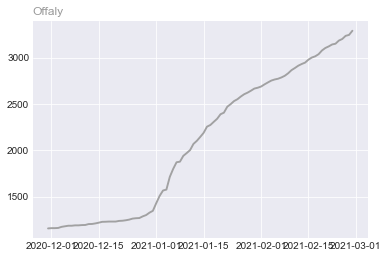

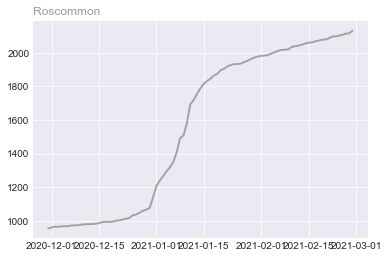

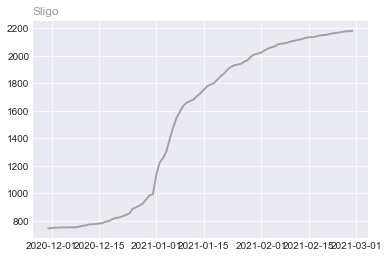

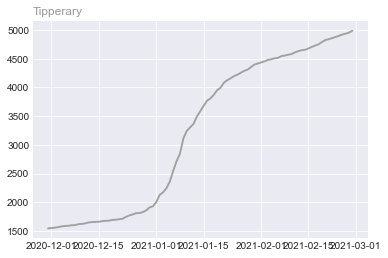

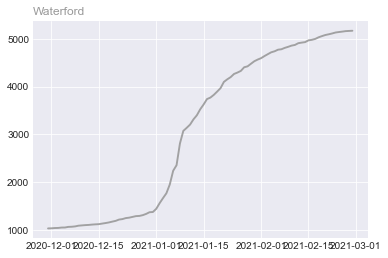

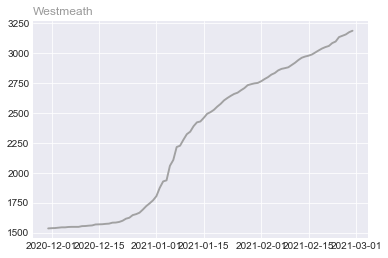

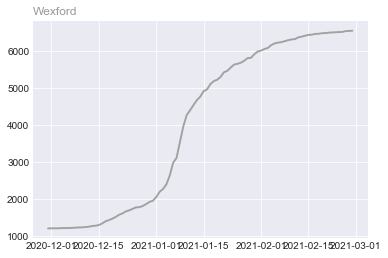

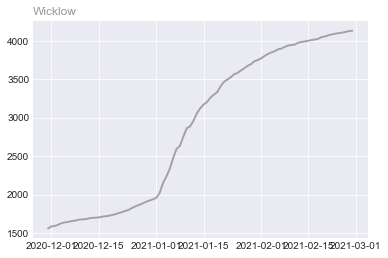

In [15]:
for countyplot in allCountiesPlot['CountyName'].unique():
    num += 1
    # Plot the lineplot
    plt.plot(allCounties.loc[allCounties['CountyName'] == countyplot, 'TimeStamp'], allCounties.loc[allCounties['CountyName'] == countyplot, 'ConfirmedCovidCases'], marker='', color=palette(num), linewidth=1.9, alpha=0.9)
    # add title
    plt.title(countyplot, loc='left', fontsize=12, fontweight=0, color=palette(num))
    plt.show()

# COVID Data for Carlow

In [18]:
carlow = covid_historic[covid_historic['CountyName'] == county]
carlow = carlow[(carlow['TimeStamp'] >= '2020-11-15') & (carlow['TimeStamp'] <= '2021-02-28')]

In [19]:
carlow

,OBJECTID,ORIGID,CountyName,PopulationCensus16,TimeStamp,IGEasting,IGNorthing,Lat,Long,UGI,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered,Shape__Area,Shape__Length
6760,6761,1,Carlow,56932,2020-11-15 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,551,967.821260,NaN,NaN,2.432352e+09,319348.572539
6786,6787,1,Carlow,56932,2020-11-16 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,556,976.603668,NaN,NaN,2.432352e+09,319348.572539
6812,6813,1,Carlow,56932,2020-11-17 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,557,978.360149,NaN,NaN,2.432352e+09,319348.572539
6838,6839,1,Carlow,56932,2020-11-18 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,565,992.412000,NaN,NaN,2.432352e+09,319348.572539
6864,6865,1,Carlow,56932,2020-11-19 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,569,999.437926,NaN,NaN,2.432352e+09,319348.572539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,9387,1,Carlow,56932,2021-02-24 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,2608,4580.903534,NaN,NaN,2.432352e+09,319348.572539
9412,9413,1,Carlow,56932,2021-02-25 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,2621,4603.737792,NaN,NaN,2.432352e+09,319348.572539
9438,9439,1,Carlow,56932,2021-02-26 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,2632,4623.059088,NaN,NaN,2.432352e+09,319348.572539
9464,9465,1,Carlow,56932,2021-02-27 00:00:00+00:00,278661,163444,52.7168,-6.8367,http://data.geohive.ie/resource/county/2ae1962...,2637,4631.841495,NaN,NaN,2.432352e+09,319348.572539


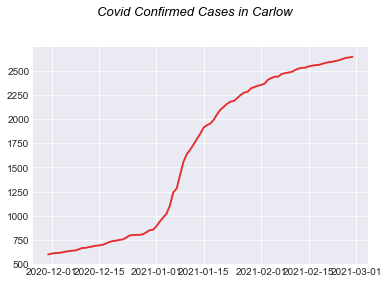

In [20]:
num = 0

plt.plot(allCounties.loc[allCounties['CountyName'] == county, 'TimeStamp'], allCounties.loc[allCounties['CountyName'] == county, 'ConfirmedCovidCases'], marker='', color=palette(num), linewidth=1.9, alpha=0.9)
# general title
plt.suptitle("Covid Confirmed Cases in " + county, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
# Show the graph
plt.show()

### COVID Data during Outbreak from Dec 2020 to Feb 2021

In [21]:
carlow = covid_historic.loc[covid_historic['CountyName'] == county, :]

In [22]:
# include 6 days before Dec 1st for initially infected people to get through exposed phase
columns = ['CountyName', 'PopulationCensus16', 'TimeStamp', 'ConfirmedCovidCases', 'PopulationProportionCovidCases']
carlowOutbreak = carlow.loc[(carlow['TimeStamp'] >= '2020-11-24') & (carlow['TimeStamp'] <= '2021-02-28'), columns]

In [23]:
carlowOutbreak['DailyConfirmedCovidCases'] = carlowOutbreak['ConfirmedCovidCases'].diff()

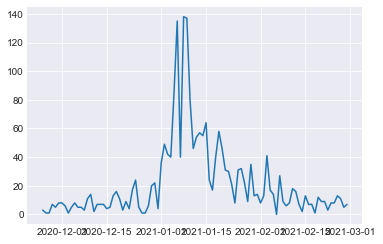

In [24]:
plt.plot(carlowOutbreak['TimeStamp'], carlowOutbreak['DailyConfirmedCovidCases'])

In [27]:
carlowOutbreak.head(20)

,CountyName,PopulationCensus16,TimeStamp,ConfirmedCovidCases,PopulationProportionCovidCases,DailyConfirmedCovidCases
6994,Carlow,56932,2020-11-24 00:00:00+00:00,577,1013.489777,NaN
7020,Carlow,56932,2020-11-25 00:00:00+00:00,580,1018.759222,3.0
7046,Carlow,56932,2020-11-26 00:00:00+00:00,581,1020.515703,1.0
7072,Carlow,56932,2020-11-27 00:00:00+00:00,582,1022.272184,1.0
7098,Carlow,56932,2020-11-28 00:00:00+00:00,589,1034.567554,7.0
7124,Carlow,56932,2020-11-29 00:00:00+00:00,594,1043.349961,5.0
7150,Carlow,56932,2020-11-30 00:00:00+00:00,602,1057.401813,8.0
7176,Carlow,56932,2020-12-01 00:00:00+00:00,610,1071.453664,8.0
7202,Carlow,56932,2020-12-02 00:00:00+00:00,616,1081.992553,6.0
7228,Carlow,56932,2020-12-03 00:00:00+00:00,617,1083.749034,1.0


In [25]:
# export to a flat file
carlowOutbreak['DailyConfirmedCovidCases'].to_csv('dailycases.csv', index=False, header=False)

### Fancy Plot

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.style.available

In [ ]:
plt.style.use('seaborn-ticks')

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes

ax.plot(carlowOutbreak['TimeStamp'], carlowOutbreak['DailyConfirmedCovidCases'], label='Daily Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Number of daily cases')
ax.set_title('Confirmed Cases of COVID-19 in ' + county)
ax.xaxis.set_ticks_position('bottom')

ax2 = ax.twinx()
ax2.plot(carlowOutbreak['TimeStamp'], carlowOutbreak['ConfirmedCovidCases'], label='Cumulative Cases', color='orange')
ax2.set_ylabel('Number of cumulative cases')

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)
fig.legend()


### Import Simulated cases

In [ ]:
simulations = pd.read_csv('covid-sim1 Validate Model-table.csv', skiprows=6)
simulations = simulations.loc[:, ['[run number]', 'dailyConfirmedCasesList']]

In [ ]:
simulations['dailyConfirmedCasesList'] = simulations['dailyConfirmedCasesList'].str.replace(' ', ',').str.replace('[','',regex=False).str.replace(']', '', regex=False)

In [ ]:
simulations['dailyConfirmedCasesList'] = simulations['dailyConfirmedCasesList'].str.split(',')

In [ ]:
# explode list out into separate rows
simulations = simulations.explode('dailyConfirmedCasesList')
simulations['dailyConfirmedCasesList'] = pd.to_numeric(simulations['dailyConfirmedCasesList'])

In [ ]:
simulations.loc['[row number]' == 4, 'dailyConfirmedCasesList']

In [ ]:
simulations.info()

### Perform t-test to validate model

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
a = carlowOutbreak['DailyConfirmedCovidCases'].fillna(0)

In [ ]:
b = simulations.loc[simulations['[run number]'] == 4, 'dailyConfirmedCasesList']

In [ ]:
simulations.loc[simulations['[run number]'] == 1, 'dailyConfirmedCasesList']

In [ ]:
ttest_ind(a, b, axis=0, equal_var=False)

In [ ]:
a = simulations.loc[simulations['[run number]'] == 3, 'dailyConfirmedCasesList']
b = simulations.loc[simulations['[run number]'] == 4, 'dailyConfirmedCasesList']

ttest_ind(a, b, axis=0, equal_var=False)

In [ ]:
carlowOutbreak